In [13]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math
from scipy.io import wavfile
import scipy.fftpack

In [14]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [15]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [16]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [17]:
def samples_from_wav():
    rate,array=wavfile.read("10kHz_44100Hz_16bit_05sec.wav")
    #print(rate)
    result=array[0:rate]
    return result    

In [18]:
def generalised_advanced_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=scipy.fftpack.fft(x)
    if transform_type==1:
        gtm=scipy.fftpack.dct(x,norm='ortho')
    if transform_type==2:
        gtm=haar(N)
        gtm=gtm*x
    return gtm   


In [19]:
def generalised_advanced_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=scipy.fftpack.ifft(X)
    if transform_type==1:
        igtm=scipy.fftpack.idct(X,norm='ortho')
    if transform_type==2:
        igtm=ihaar(N)
        igtm=igtm*X
    #print(igtm)
    return igtm

In [20]:
def mse_advanced(transform_type,x,X,N):
    error=[]
    fraction=100
    for l in range(0,N,fraction):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_advanced_inverse_transform(0,Xm)
            print(xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_advanced_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_advanced_inverse_transform(2,Xm)    
        #print(x.shape)
        #print(xm.shape)
        #print(np.dot(x,xm))
        y=xm-x
        error=np.append(error,np.dot(y,np.conjugate(y))/N)
    print(error)
    return error

[-4.12469253e-17-2.70311878e-12j  2.24270000e+04-6.75716716e-13j
  6.52700000e+03+2.57793283e-18j ...  2.05280000e+04-1.44333542e-11j
 -6.52700000e+03+8.65845773e-12j -2.24280000e+04+1.56511561e-11j]
[-4.72263111e-02+0.00328009j  2.24270472e+04-0.00328197j
  6.52695280e+03+0.00328367j ...  2.05280473e+04-0.00327348j
 -6.52704725e+03+0.00327585j -2.24279528e+04-0.00327806j]
[-4.75103404e-02+3.20506045e-06j  2.24270473e+04+1.38114202e-06j
  6.52695283e+03-5.96706886e-06j ...  2.05280480e+04-1.69560689e-05j
 -6.52704785e+03+1.23745992e-05j -2.24279523e+04-7.79059700e-06j]
[-9.46139355e-02-0.00124551j  2.24270958e+04+0.00119766j
  6.52690296e+03-0.00114926j ...  2.05280909e+04+0.00138557j
 -6.52709213e+03-0.00133949j -2.24279066e+04+0.00129279j]
[-1.09556126e-01-0.00195212j  2.24271098e+04+0.00190244j
  6.52688993e+03-0.00185122j ...  2.05281086e+04+0.00209148j
 -6.52710894e+03-0.00204668j -2.24278907e+04+0.00200021j]
[-8.79553348e-02+1.40760950e-04j  2.24270885e+04-9.96883877e-05j
  6.526

[-1.71951504e-01+3.89668923e-04j  2.24271369e+04-2.35265084e-04j
  6.52689774e+03+3.27989960e-05j ...  2.05282547e+04-3.33510284e-04j
 -6.52723381e+03+4.44379976e-04j -2.24277948e+04-4.64467391e-04j]
[-1.80727417e-01+0.00146254j  2.24271251e+04-0.00193489j
  6.52692766e+03+0.00199974j ...  2.05282998e+04+0.00111499j
 -6.52727432e+03-0.00024188j -2.24277673e+04-0.00068216j]
[-1.84656927e-01-4.67134265e-05j  2.24271373e+04+5.33701728e-04j
  6.52690974e+03-9.04867300e-04j ...  2.05282815e+04-1.06474972e-03j
 -6.52726113e+03+8.49790972e-04j -2.24277725e+04-4.50412506e-04j]
[-1.85067000e-01-0.00137235j  2.24271562e+04+0.00107498j
  6.52687652e+03-0.00053733j ...  2.05282412e+04+0.00050048j
 -6.52722832e+03-0.00104896j -2.24277907e+04+0.00136298j]
[-1.74738115e-01+0.00102862j  2.24271129e+04-0.00042101j
  6.52694312e+03-0.00028348j ...  2.05283129e+04-0.00116399j
 -6.52728281e+03+0.00144841j -2.24277657e+04-0.00139953j]
[-1.58928741e-01-0.00205577j  2.24270861e+04+0.00146506j
  6.52697472e+0

[-1.05263781e-01-0.00095709j  2.24269382e+04+0.00276109j
  6.52715716e+03-0.00266728j ...  2.05284283e+04-0.00234437j
 -6.52738630e+03+0.00293233j -2.24277270e+04-0.00150477j]
[-9.05090857e-02-1.58700896e-04j  2.24269320e+04-1.51490857e-04j
  6.52715060e+03+3.55922741e-04j ...  2.05284386e+04+4.22251381e-05j
 -6.52738416e+03-3.07498828e-04j -2.24277400e+04+3.58099271e-04j]
[-8.86928172e-02-0.00280411j  2.24269394e+04+0.00385847j
  6.52713910e+03-0.00217727j ...  2.05284341e+04-0.00377905j
 -6.52737322e+03+0.00311175j -2.24277498e+04-0.0002383j ]
[-1.02504588e-01+1.97631717e-04j  2.24269538e+04-5.53463487e-05j
  6.52713440e+03-1.26782311e-04j ...  2.05284185e+04+1.26758771e-04j
 -6.52736359e+03+5.53743113e-05j -2.24277465e+04-1.97643964e-04j]
[-1.18564398e-01-0.00179735j  2.24269589e+04+0.00239422j
  6.52714413e+03-0.00124123j ...  2.05284080e+04-0.00235017j
 -6.52736743e+03+0.00194095j -2.24277311e+04-0.00011315j]
[-1.31653895e-01+0.00139397j  2.24269783e+04+0.00016326j
  6.52713268e+0

[-3.69267921e-01-0.00097315j  2.24272373e+04+0.00054632j
  6.52712168e+03+0.00055951j ...  2.05282293e+04-0.00081809j
 -6.52718412e+03+0.00082892j -2.24277183e+04+0.00019048j]
[-4.27595563e-01+1.87898874e-05j  2.24272745e+04+1.76240931e-05j
  6.52715209e+03-3.19009117e-05j ...  2.05281828e+04+2.80910779e-05j
 -6.52713062e+03+4.71995808e-06j -2.24277119e+04-3.16023691e-05j]
[-4.06868007e-01+2.14613985e-05j  2.24273015e+04-3.85642335e-04j
  6.52711142e+03+2.60320534e-04j ...  2.05282173e+04-1.56758708e-04j
 -6.52712007e+03-2.91785158e-04j -2.24277542e+04+3.69960891e-04j]
[-4.21840319e-01+5.59557221e-05j  2.24273042e+04+1.61649927e-03j
  6.52712443e+03-1.21563379e-03j ...  2.05282026e+04+8.44170530e-04j
 -6.52711090e+03+1.13252075e-03j -2.24277461e+04-1.65664194e-03j]
[-4.03048312e-01-0.00247375j  2.24273132e+04-0.00126215j
  6.52709920e+03+0.00336241j ...  2.05282269e+04-0.00325648j
 -6.52711383e+03+0.00035877j -2.24277684e+04+0.00300388j]
[-4.05062596e-01-0.00044476j  2.24273174e+04+0.0

[-4.12008942e-01+0.00116457j  2.24274350e+04+0.00091685j
  6.52706436e+03-0.00115804j ...  2.05283188e+04+0.00090021j
 -6.52704641e+03-0.00117104j -2.24278934e+04-0.00090855j]
[-4.16384213e-01-0.00128107j  2.24274578e+04-0.00043587j
  6.52706905e+03+0.00127175j ...  2.05283418e+04-0.00038093j
 -6.52704235e+03+0.0012898j  -2.24279163e+04+0.00040849j]
[-3.94080639e-01-0.00318751j  2.24274604e+04+0.00179623j
  6.52704712e+03+0.00325149j ...  2.05283430e+04+0.00202087j
 -6.52706501e+03+0.00311949j -2.24279181e+04-0.00190976j]
[-4.20383259e-01+0.0014587j   2.24274729e+04+0.00096152j
  6.52707397e+03-0.00141076j ...  2.05283576e+04+0.00081384j
 -6.52703930e+03-0.00150302j -2.24279317e+04-0.00088878j]
[-3.95660257e-01+0.00043211j  2.24274513e+04-0.00178071j
  6.52704815e+03-0.00054626j ...  2.05283334e+04-0.00182868j
 -6.52706285e+03-0.00031619j -2.24279088e+04+0.00180841j]
[-4.05982218e-01-0.00048583j  2.24274743e+04-0.00138221j
  6.52706015e+03+0.00037754j ...  2.05283577e+04-0.00129783j
 -

[-0.11925084-0.00148517j -0.51449733-0.00046204j -0.6941027 +0.00112926j
 ... -0.09281444+0.00142135j  0.21535611+0.00095984j
  0.20567533-0.00068199j]
[-0.084547  +0.00320184j -0.50854825+0.0001387j  -0.72424217-0.00309318j
 ... -0.12799781-0.00342369j  0.19689219-0.00134534j
  0.22659584+0.00236971j]
[-0.09375377+1.41325114e-03j -0.49636287+1.70049443e-03j
 -0.70543618-5.87765808e-05j ... -0.11337215-9.15551566e-04j
  0.19080937-1.87110116e-03j  0.20717241-5.74814340e-04j]
[-0.07828819+0.0012219j  -0.44470564+0.00114369j -0.67923338-0.00029601j
 ... -0.11215571-0.00093598j  0.14363956-0.00134696j
  0.16792913-0.00015448j]
[-0.1084823 +0.00225792j -0.4575421 -0.00020155j -0.65939807-0.00242371j
 ... -0.08376425-0.00252308j  0.16422766-0.00056436j
  0.1562135 +0.00205885j]
[-0.11529612-0.00092128j -0.46258281+0.00093086j -0.6568245 +0.00169905j
 ... -0.07782511+0.00128314j  0.17054137-0.00049966j
  0.15557058-0.00170062j]
[-0.12944757+2.05861071e-03j -0.47748429-9.94775006e-05j
 -0.655

[-0.03925472+1.09361600e-03j -0.17159184+1.47583510e-03j
 -0.35472677+9.52244048e-04j ... -0.2696103 -1.47898271e-03j
 -0.1052474 -1.03791976e-03j -0.013971  +4.01779577e-05j]
[-0.04173587-3.52659221e-05j -0.14824996+1.81317351e-03j
 -0.31982804+2.56731492e-03j ... -0.29115276-1.72031060e-03j
 -0.14004809-2.56555652e-03j -0.04078696-1.86242144e-03j]
[-0.0200191 -0.00184439j -0.13621003+0.0020105j  -0.32464249+0.00467244j
 ... -0.30408394-0.00191209j -0.13612147-0.00463302j
 -0.02243027-0.00460489j]
[-0.02093018-1.54052422e-03j -0.1318843 -2.23892016e-03j
 -0.31764076-1.63142104e-03j ... -0.30844032+2.23932204e-03j
 -0.14319875+1.62044669e-03j -0.02807122+5.64133375e-05j]
[-0.00930658-0.00073807j -0.131014  +0.00027747j -0.32809279+0.00113396j
 ... -0.30901282-0.00032486j -0.13265512-0.00116025j
 -0.01247087-0.00133052j]
[-0.00414677+0.00341565j -0.14218062+0.00204783j -0.34937097-0.00047354j
 ... -0.2969131 -0.00186453j -0.1113729 +0.00069249j
  0.00599473+0.00285943j]
[-0.00892742+0.0

[-0.26919649-3.16454933e-04j -0.27329765-4.84278008e-04j
 -0.28157431-5.73343653e-04j ... -0.28139159+3.50582299e-04j
 -0.27462589+1.37922600e-04j -0.26986638-9.71672510e-05j]
[-0.23935838-0.00427032j -0.24496738-0.00320661j -0.25928545-0.00163931j
 ... -0.27292809-0.00330568j -0.25558329-0.00432408j
 -0.24329788-0.00466338j]
[-0.22777054+0.00162512j -0.21886133+0.00034345j -0.22271913-0.00099027j
 ... -0.30569321+0.00342573j -0.27590946+0.00329262j
 -0.24803237+0.00266048j]
[-0.25796071-1.10908499e-03j -0.25240923-1.21017186e-03j
 -0.25455895-1.13437216e-03j ... -0.30364528-5.11300039e-06j
 -0.28685782-4.59048812e-04j -0.27029379-8.45887073e-04j]
[-0.27901445-0.00231434j -0.24571194-0.00234721j -0.22109181-0.00204943j
 ... -0.37651971-0.00050067j -0.35079066-0.00132112j
 -0.31607989-0.00195546j]
[-0.28373015-0.00133724j -0.25252018-0.0018957j  -0.22905002-0.00219699j
 ... -0.37251177+0.00101413j -0.34970418+0.00022355j
 -0.3180398 -0.00059736j]
[-0.28309914+1.13479986e-03j -0.25589083

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[2.98627300e-22 6.01184884e-04 1.67295214e-03 4.06021837e-03
 7.40826734e-03 1.24946665e-02 2.07192349e-02 3.12420316e-02
 4.61392277e-02 6.51471123e-02 8.80113852e-02 1.15058677e-01
 1.49170962e-01 1.89408353e-01 2.35839674e-01 2.87824911e-01
 3.48183278e-01 4.18534940e-01 4.95831990e-01 5.80845170e-01
 6.76962009e-01 7.85750957e-01 9.05057116e-01 1.03357750e+00
 1.17859832e+00 1.33339158e+00 1.50101634e+00 1.68542220e+00
 1.88022740e+00 2.09262071e+00 2.31872457e+00 2.56247590e+00
 2.81921452e+00 3.09796519e+00 3.39079585e+00 3.70432942e+00
 4.03666869e+00 4.38397746e+00 4.75622352e+00 5.15138847e+00
 5.56874183e+00 6.00857841e+00 6.46444229e+00 6.94846802e+00
 7.45853585e+00 7.99754941e+00 8.55767954e+00 9.15139183e+00
 9.76590146e+00 1.04159492e+01 1.10897770e+01 1.17946775e+01
 1.25315987e+01 1.33016966e+01 1.41104806e+01 1.49519979e+01
 1.58251803e+01 1.67443700e+01 1.76986535e+01 1.86835363e+01
 1.97026179e+01 2.07558717e+01 2.18575998e+01 2.30048094e+01
 2.41999119e+01 2.543932

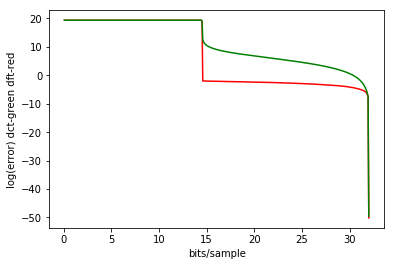

In [23]:
# input sequence generator

#real=np.random.rand(length)
#img=np.random.rand(length)
#x=real+1j*img
x=samples_from_wav()
N=x.shape[0]
b=32
color=['r',
       'g','b']
for i in range(0,2,1):
    X=generalised_advanced_transform(i,x)
    #print(X)
    err=mse_advanced(i,x,X,x.shape[0])
    err=np.log(err)
    print(err.shape)
    a=np.arange(0,x.shape[0],100)
    a=32*(N-a)/N
    plt.plot(a,err,color[i])
    plt.xlabel("bits/sample")
    plt.ylabel("log(error) dct-green dft-red")
    

#y=generalised_inverse_transform(0,X)

